Which song spent the most weeks atop the Billboard charts?

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
?billboard

In [6]:
billboard %>% head(5)

artist,track,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,⋯,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82,72,77,87,94,99,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2Ge+her,The Hardest Part Of ...,2000-09-02,91,87,92,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Kryptonite,2000-04-08,81,70,68,67,66,57,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Loser,2000-10-21,76,76,72,69,67,65,55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
504 Boyz,Wobble Wobble,2000-04-15,57,34,25,17,17,31,36,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [22]:
billboard %>% 
    pivot_longer(names_to = 'week', values_to = 'rank', 
                 cols = -one_of('track', 'artist', 'date.entered')) %>%
    filter(rank == 1) %>%
    group_by(track, artist) %>%
    count() %>%
    arrange(desc(n))

track,artist,n
<chr>,<chr>,<int>
Independent Women Pa...,Destiny's Child,11
"Maria, Maria",Santana,10
Come On Over Baby (A...,"Aguilera, Christina",4
I Knew I Loved You,Savage Garden,4
Music,Madonna,4
Be With You,"Iglesias, Enrique",3
Doesn't Really Matte...,Janet,3
Say My Name,Destiny's Child,3
Amazed,Lonestar,2


In [21]:
billboard %>% 
    pivot_longer(names_to = 'week', values_to = 'rank', 
                 cols = -one_of('track', 'artist', 'date.entered')) %>%
    filter(rank == 1) %>%
    group_by(track, artist) %>%
    summarize(n = n()) %>%
    arrange(desc(n))

track,artist,n
<chr>,<chr>,<int>
Independent Women Pa...,Destiny's Child,11
"Maria, Maria",Santana,10
Come On Over Baby (A...,"Aguilera, Christina",4
I Knew I Loved You,Savage Garden,4
Music,Madonna,4
Be With You,"Iglesias, Enrique",3
Doesn't Really Matte...,Janet,3
Say My Name,Destiny's Child,3
Amazed,Lonestar,2


ERROR while rich displaying an object: Error: stat_count() must not be used with a y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

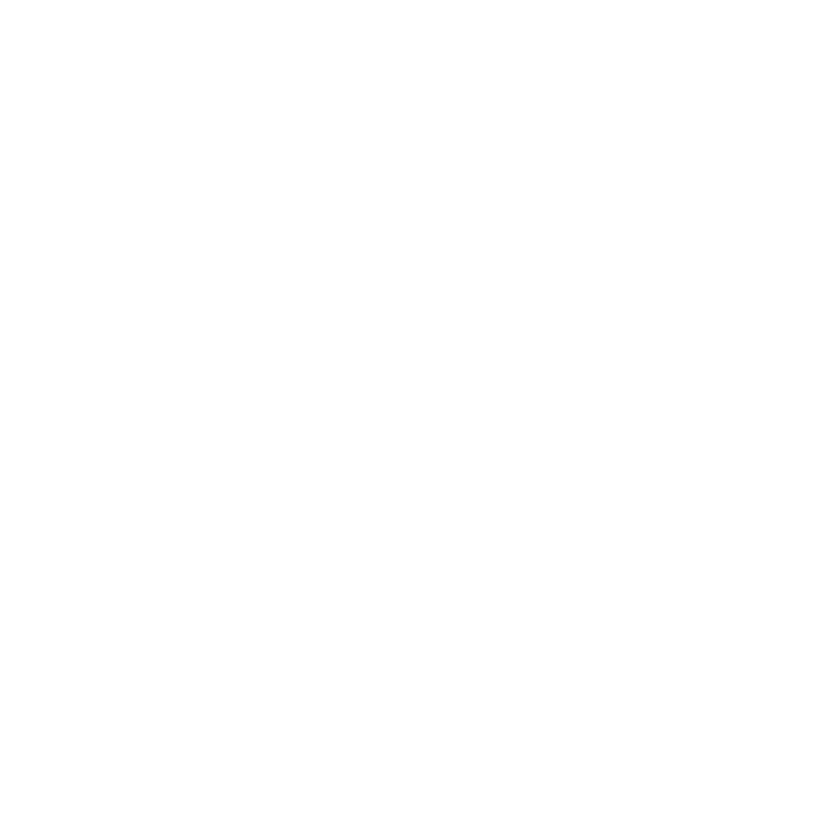

In [24]:
billboard.long = billboard %>% 
    pivot_longer(names_to = 'week', values_to = 'rank', 
                 cols = -one_of('track', 'artist', 'date.entered')) %>%
    filter(rank == 1) %>%
    group_by(track, artist) %>%
    summarize(n = n()) %>%
    arrange(desc(n))

# Use forcats to order by n

# Make bar chart with track on x axis and n on y axis